In [1]:
import pandas as pd
# rujukan dataset bisa dilihat dalam link ini : https://www.kaggle.com/yufengdev/bbc-fulltext-and-category
df = pd.read_csv('bbc-text.csv')

In [2]:
# melihat bentuk dan jumlah data yang ada dalam dataset
# mengikuti kriteria point 1: Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel
df.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [3]:
# mengubah data categorical menjadi numerical
category = pd.get_dummies(df['category'])
dfBaru = pd.concat([df, category], axis=1)
dfBaru = dfBaru.drop(columns=['category'])
dfBaru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [4]:
# jadikan rujukan penamaan category
dfBaru.columns

Index(['text', 'business', 'entertainment', 'politics', 'sport', 'tech'], dtype='object')

In [5]:
text = dfBaru['text'].values
label = dfBaru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [6]:
# Mengikuti kriteria point 4: validasi set sebesar 20%
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=.2)

In [7]:
# mengikuti kriteria point 6: Harus menggunakan fungsi tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sekuens_latih = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sekuens_latih, padding='post')
padded_test = pad_sequences(sekuens_test, padding='post')

In [8]:
import tensorflow as tf
# mengikuti kriteria point 3: Harus menggunakan model sequential
model = tf.keras.Sequential([
    # mengikuti kriteria point 5: Harus menggunakan fungsi tokenizer
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    # mengikuti kriteria point 2: Harus menggunakan LSTM dalam arsitektur model
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# mengikuti saran point 2: Mengimplementasikan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9) and (logs.get('accuracy')>0.9):
      print('\nAkurasi telah mencapai > 90%')
      self.model.stop_training = True
callbacks = myCallback()

In [10]:
# mengikuti kriteria point 7: Akurasi dari model minimal 75%
# mengikuti saran point 1: Akurasi dari model di atas 80%.
num_epochs = 30
history = model.fit(padded_latih, label_train, epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
56/56 - 346s - loss: 1.6067 - accuracy: 0.2208 - val_loss: 1.6008 - val_accuracy: 0.2270
Epoch 2/30
56/56 - 345s - loss: 1.4067 - accuracy: 0.3994 - val_loss: 0.9244 - val_accuracy: 0.6225
Epoch 3/30
56/56 - 346s - loss: 0.7290 - accuracy: 0.6831 - val_loss: 0.5036 - val_accuracy: 0.7618
Epoch 4/30
56/56 - 348s - loss: 0.3725 - accuracy: 0.8045 - val_loss: 0.4545 - val_accuracy: 0.7978
Epoch 5/30
56/56 - 348s - loss: 0.2603 - accuracy: 0.8798 - val_loss: 0.4431 - val_accuracy: 0.8584
Epoch 6/30
56/56 - 352s - loss: 0.1511 - accuracy: 0.9455 - val_loss: 0.3538 - val_accuracy: 0.8921
Epoch 7/30

Akurasi telah mencapai > 90%
56/56 - 349s - loss: 0.0438 - accuracy: 0.9888 - val_loss: 0.3768 - val_accuracy: 0.9011


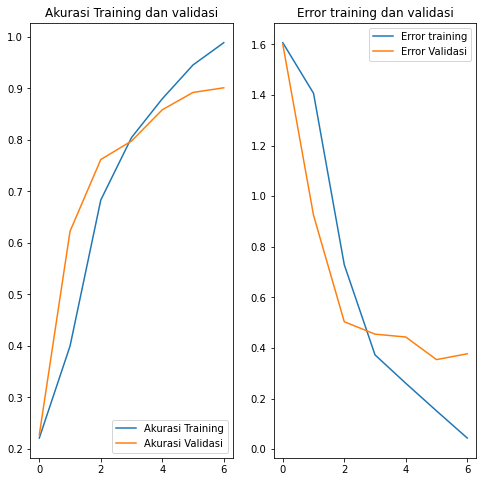

In [13]:
# mengikuti saran point 3: Membuat plot loss dan akurasi pada saat training dan validation
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 7
jarak_epochs = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(jarak_epochs, acc, label='Akurasi Training')
plt.plot(jarak_epochs, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Training dan validasi')

plt.subplot(1, 2, 2)
plt.plot(jarak_epochs, loss, label='Error training')
plt.plot(jarak_epochs, val_loss, label='Error Validasi')
plt.legend(loc='upper right')
plt.title('Error training dan validasi')
plt.show()